# Introduction
    To determine the "best" neighborhood in Pittsburgh, we decided that the "best" neighborhood would be the "healthiest". We first started with the metric of "best neighborhood to eat at" but quickly found there were not many datasets on food that met our standards. So, we noticed a tag in the WRDC website that said "Health". The "Health" tag had plenty of datasets to work with, so we chose our metric to be "the healthiest neighborhood".

# The Metric:
    For our metric, "the healthiest neighborhood", we looked at datasets from the Western Pennsylvania Regional Data Center and chose three datasets: hospital locations, smoking rates, and fast food locations. First for smoking rates, the more a population of a given neighborhood smokes, the higher their smoking rate will be. If we take the average smoking rate of a census tract given from the WRDC, we can determine which neihborhood has the lowest and hgihest average smoking rate. The neighborhood with the lowest average smoking rate will be deemed the healthiest. Second is the hospitals, looking at the locations of all the hospitals given by the WRDC we can pinpoint which neighborhoods have hospitals. Having a hospital in a given neighborhood increases the overalll primary care access to that neighborhood, thus making it a healthier neighborhood with healthier residents compared to a neighborhood without a hospital. Lastly is the fast food, looking at the fast food locations given by the WRDC dataset, we can determine which neighborhoods have the most fast food establishments. The more fast food establishments in a given neighborhood, the less options for  whole/organic foods for residents in that neighborhood. The less "healthy" food there is the less "healthy" the neighborhood, and vice versa.

# Data to Prove:

# Smpoking: The Idea Behind the Metric
    - We are taking a look at a smoking rates census taken from 2006 to 2010. I would imagine that data has not changed too much since then, therefore it is still relevent. The higher the smoking rate in a given neighborhood, the less healthy that neighborhood is considered. I will convert the census data into a data frame, taking the average of each neighborhood's smoking rates. I will then create a graph to display the data.

In [5]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
smoking_rates = pd.read_csv("smoking_data.csv")

neighborhood_data = dict()
i = 0

while i < len(smoking_rates):
    
    census_data = fp.census_to_neighborhoods(smoking_rates.at[i, 'tractfips'])
    
    if census_data == None:
        i+=1
        continue
    
    else:
        for hood_name in census_data:

            if hood_name in neighborhood_data:
                neighborhood_data[hood_name][0] = neighborhood_data[hood_name][0] + smoking_rates.at[i, 'estimated smoking prevalence, 2006-2010']
                neighborhood_data[hood_name][1] = neighborhood_data[hood_name][1] + 1

            else:
                neighborhood_data[hood_name] = [smoking_rates.at[i, 'estimated smoking prevalence, 2006-2010'], 1]
        i+=1
        
    
print(neighborhood_data)

{'Bedford Dwellings': [3.6726457149999994, 16], 'Middle Hill': [1.4719761820000001, 6], 'North Oakland': [3.6726457149999994, 16], 'Lower Lawrenceville': [6.478483086000001, 27], 'Bluff': [3.6726457149999994, 16], 'Polish Hill': [5.946294654000001, 25], 'Central Business District': [1.4719761820000001, 6], 'South Side Slopes': [5.820750248, 22], 'West End': [4.368284642, 19], 'Crawford-Roberts': [1.4719761820000001, 6], 'South Oakland': [4.158892527999999, 18], 'Upper Hill': [3.6726457149999994, 16], 'South Shore': [3.6503704330000004, 15], 'Chateau': [5.421161643000001, 21], 'West Oakland': [3.6726457149999994, 16], 'Strip District': [3.7456251210000002, 15], 'Terrace Village': [3.6726457149999994, 16], 'South Side Flats': [5.820750248, 22], 'Garfield': [6.330560320000001, 29], 'East Liberty': [6.496116527999999, 30], 'Morningside': [5.798371888000001, 27], 'Bloomfield': [8.696786061, 40], 'Central Lawrenceville': [2.805837371, 11], 'Stanton Heights': [6.330560320000001, 29], 'Upper L

# Interpreting this Code:
    - I am adding every name of the neighborhood to a dictionary as a key. Then, I am setting the value of that key as a list. The first item in the list is the sum of the smoking rates data gathered for that neighborhood and the second item is how many times data from that neighborhood was collected. Essentially, I will take the average of the sum of the smoking rate with how many times the data from that neighborhood was taken to get the average smoking rate per-neighborhood.

In [7]:
temp_dict = dict()
temp_list = list()

for key in neighborhood_data:
    temp_dict[key] = neighborhood_data[key][0] / neighborhood_data[key][1]

smoking = pd.DataFrame(
    {
        'hoods' : temp_dict.keys(),
        'avg smoking rate' : temp_dict.values()
    }
)

sorted_smoking = smoking.sort_values('avg smoking rate', ascending = True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_smoking)

,hoods,avg smoking rate
43,Glen Hazel,0.185913
32,Point Breeze,0.191285
44,Swisshelm Park,0.192894
31,Friendship,0.194225
45,Regent Square,0.195695
38,Homewood West,0.195730
35,Larimer,0.195730
37,Highland Park,0.195818
25,Squirrel Hill North,0.196915
33,Point Breeze North,0.197031


# Converting the dictionary to a Dataframe:
    - After getting the average smoking rate, I am adding the average to a temporary dictionary with a key of the same neighborhood. I will then use this temporary dictionary to create my dataframe. I also sorted the dataframe to give me the neighborhoods with the lowest to highest smoking rate.

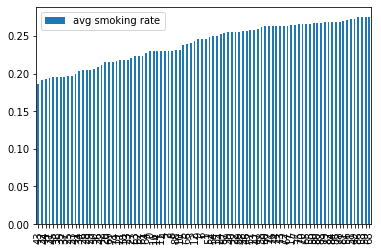

In [8]:
sorted_smoking.plot(kind = 'bar')

This plot just mainly visualizes the entire dataset in a sorted manor.

# Conclusion
    - From this data, we can see the top 5 neighborhoods with the lowest average smoking rate is Glen Hazel with 0.185913, Point Breeze with 0.191285, Swisshelm Park with 0.192894, Friendship with 0.194225, and Regent Square with 0.195695. The neighorhoods with the highest smoking rates were Esplen with 0.275161, Knoxville with 0.275128, Mt. Oliver with 0.275128, Summer Hill with 0.274942, and Arlington with 0.271798.

## Hospitals: The Idea Behind the Metric
    -The more hospitals in a given neighborhood means more care access to an individual. The more care access there is, the more likely the citizens of that neighborhood will be in good health.

## How it is measured?
    - We first will look at the lattitude and logitude of a given hospital. Using "fpsnippets" we will estimate the lattitude and longitude to a neighborhood location. We will then create a dictionary of neighborhoods as the key and adding a value to the key everytime a hospital is located in that neighborhood. We will then create a bar graph using neighborhoods as the "x" value and the number of hospitals as the "y" value to represent my data.

In [9]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [10]:
raw_hospitals = pd.read_csv("data-hospitallocations.csv")

neighborhoods = dict()
i = 0

while i < len(raw_hospitals):
    
    neighborhood_name = fp.geo_to_neighborhood(raw_hospitals.at[i, 'Y'], raw_hospitals.at[i, 'X'])
    
    if neighborhood_name in neighborhoods:
        neighborhoods[neighborhood_name] = neighborhoods[neighborhood_name] + 1
        
    else:
        neighborhoods[neighborhood_name] = 1
        
    i+=1
    
print(neighborhoods)

{'Central Lawrenceville': 1, 'South Oakland': 1, None: 14, 'Bluff': 1, 'West Oakland': 1, 'Shadyside': 1, 'Lincoln-Lemington-Belmar': 1, 'Central Northside': 1, 'Bloomfield': 1, 'North Oakland': 1}


I created a dictionary that used the neighborhood name as the key and the number of hospitals in that neighborhood as values. I found that a lot of hospitals were located outside the Pittsburgh vicinity, more so around Allegheny County (which aren't counted)

In [11]:
hospitals = pd.DataFrame(
    {
        'hoods' : neighborhoods.keys(),
        '# of hospitals' : neighborhoods.values()
    }
)

display(hospitals)

,hoods,# of hospitals
0,Central Lawrenceville,1
1,South Oakland,1
2,None,14
3,Bluff,1
4,West Oakland,1
5,Shadyside,1
6,Lincoln-Lemington-Belmar,1
7,Central Northside,1
8,Bloomfield,1
9,North Oakland,1


I converted the dictionary into a pandas data frame.

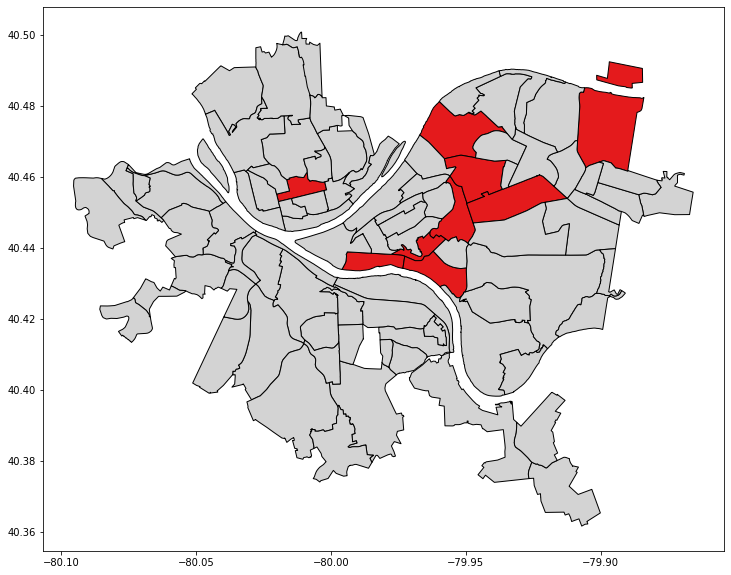

In [12]:
neighborhoods_list = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
hospitals_map = neighborhoods_list.merge(hospitals, how='left', left_on='hood', right_on='hoods')
hospitals_map.plot(column='# of hospitals', # set the data to be used for coloring
               cmap='Set1',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend_kwds={'label': "Hospitals in Pittsburgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

# Conclusion
    - This map highlights the neighborhoods in Pittsburgh that have a hospital in them. Only 1 hospital was found in each neighborhood. Even though there are not many hospitals, the data can still be used in combination with the other data to determine the "healthiest" neighborhood. These neighborhoods with hospitals include: Central Lawrenceville, South Oakland, Bluff, West Oakland, Shadyside, Lincoln-Lemington-Belmar, Central Northside, Bloomfield, and North Oakland.

## Fast Food: The Idea Behind the Metric
    More fast food restaurants in a given neighborhood indicates hotspots for fast food eaters. The more fast food consumed in a region, the more likely the citizens of that neighborhood will be in poorer health.

## How it is measured?
    FastFoodEstablishmentData.csv lists every location of fast food in Allegheny County. First, we will look at the lattitude and logitude of a given establishment. Using "fpsnippets" we will assign the lattitude and longitude to a neighborhood location. We will then create a dictionary of neighborhoods as the key, incrementing everytime an establishment is found to be located in that neighborhood.

<img src="https://s7d1.scene7.com/is/image/mcdonalds/crown_point_mcdonalds-RR-EDIT_003:1-column-desktop?resmode=sharp2"
     alt="mcdonalds"
     style="float: left; margin-right: 10px;" />

In [13]:
import fpsnippets as fp
import pandas as pd
import numpy as np
import geopandas
%matplotlib inline
import matplotlib.pyplot as plt

In [14]:
raw_establishments = pd.read_csv("FastFoodEstablishmentData.csv")

neighborhoods = dict()
i = 0

while i < len(raw_establishments):
    
    neighborhood_name = fp.geo_to_neighborhood(raw_establishments.at[i, 'Lat'], raw_establishments.at[i, 'Lon'])
    
    if neighborhood_name in neighborhoods:
        neighborhoods[neighborhood_name] = neighborhoods[neighborhood_name] + 1
        
    else:
        neighborhoods[neighborhood_name] = 1
        
    i+=1
    
print(neighborhoods)

{None: 606, 'Central Business District': 62, 'Carrick': 9, 'Westwood': 3, 'Banksville': 3, 'Central Oakland': 17, 'South Side Flats': 19, 'Bloomfield': 14, 'Oakwood': 2, 'Shadyside': 13, 'Squirrel Hill South': 15, 'Bluff': 3, 'East Liberty': 5, 'Lincoln-Lemington-Belmar': 10, 'Central Northside': 4, 'Allegheny Center': 2, 'Strip District': 3, 'South Shore': 4, 'North Oakland': 13, 'Friendship': 1, 'Central Lawrenceville': 3, 'Squirrel Hill North': 3, 'Larimer': 3, 'Mount Washington': 2, 'Brookline': 3, 'Homewood West': 1, 'Chateau': 3, 'Beechview': 2, 'Allegheny West': 3, 'Greenfield': 2, 'East Allegheny': 1, 'Point Breeze': 1, 'Crawford-Roberts': 1, 'Upper Lawrenceville': 1, 'Elliott': 1}


The dictionary that has been created assigns each data point to a neighborhood, but majorly 'None'. This is because the majority of fast food establishments in Allegheny County fall outside of Pittsburgh, and they will be ignored in our study.

In [15]:
establishments = pd.DataFrame(
    {
        'Neighborhood' : neighborhoods.keys(),
        'Fast Food Establishments' : neighborhoods.values()
    }
)

sorted_establishments = establishments.sort_values(by = 'Fast Food Establishments', ascending = False)
display(sorted_establishments)

,Neighborhood,Fast Food Establishments
0,None,606
1,Central Business District,62
6,South Side Flats,19
5,Central Oakland,17
10,Squirrel Hill South,15
7,Bloomfield,14
18,North Oakland,13
9,Shadyside,13
13,Lincoln-Lemington-Belmar,10
2,Carrick,9


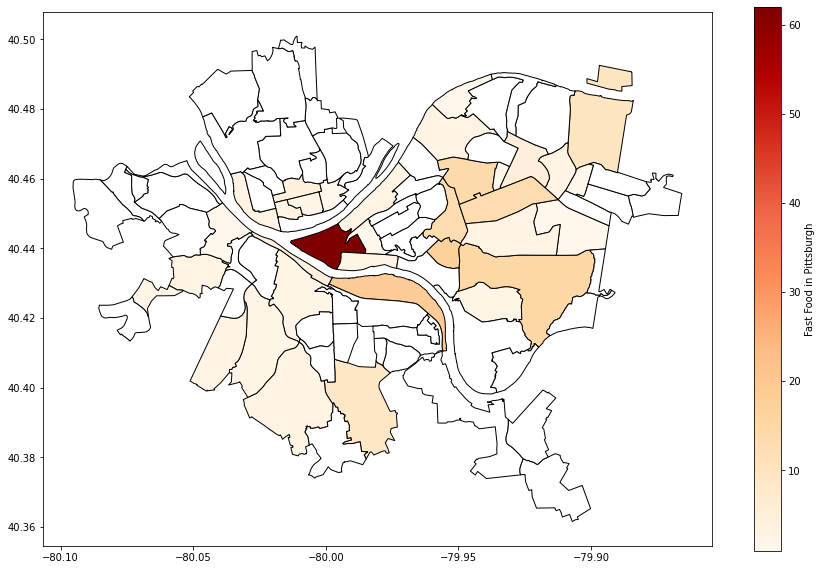

In [16]:
neighborhoods_list = geopandas.read_file("Neighborhoods/Neighborhoods_.shp") # read in the shapefile
establishments_map = neighborhoods_list.merge(establishments, how='left', left_on='hood', right_on='Neighborhood')
establishments_map.plot(column='Fast Food Establishments', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in black
               legend = True,
               legend_kwds={'label': "Fast Food in Pittsburgh"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "white"} # set disctricts with no data to gray
               )

# Conclusion
    After analysis of the neighborhood heat map, the Central Business District stands out as a significant outlier in terms of fast food establishment count. In second place comes the South Side Flats, which makes sense since it is a neighborhood known for its food. These are followed by Central Oakland and Squirrel Hill South, which also make sense since it is where the college students of the city are located.

# Final Conclusions
    After looking at all the data, The top 3 healthiest neighborhoods were: Point Breeze, Friendship, and Homewood West. The top 3 unhealthiest places were: Central Business District, South Side Flats, and Central Oakland. After analyzing the data, we can see that a lot of places that have hospitals are actually in areas that aren't the healthiest which kind of makes sense. Areas that are more prone to poorer health would probably need better primary care access.

# David's Opinion:
    I'm not too familiar with the healthiest neighborhoods but my favorite out of the three is Friendship because it close by to other neighborhoods that I like. Also the houses in Friendship look pretty cool.

# Lucas's Opinion:
    The "healthiest" neighborhood is very different from my personal favorite of Shadyside. I am a little sad not to see it up there, but it is okay.